In [18]:
import mne
import pandas as pd
import numpy as np
import pyedflib
import os
from pathlib import Path

In [2]:
metadata = pd.read_csv('subject-info.csv')

In [3]:
metadata.head()

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0


In [5]:

data_dir = Path(r'C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs')
# Load the background EEG recordings
subjects = [f'Subject{i:02d}_1.edf' for i in range(36)]
background_data = [mne.io.read_raw_edf(data_dir / subject, preload=True) for subject in subjects]

# Load the EEG recordings during the mental arithmetic task
subjects = [f'Subject{i:02d}_2.edf' for i in range(36)]
task_data = [mne.io.read_raw_edf(data_dir / subject, preload=True) for subject in subjects]


Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject03_1.edf...
EDF file detected
S

In [6]:
data_dir = Path(r'C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs')

In [8]:
# Load the EEG recordings for both background and task
subjects_bg = [f'Subject{i:02d}_1.edf' for i in range(36)]
subjects_task = [f'Subject{i:02d}_2.edf' for i in range(36)]
raw_bg = [mne.io.read_raw_edf(data_dir / subject, preload=True) for subject in subjects_bg]
raw_task = [mne.io.read_raw_edf(data_dir / subject, preload=True) for subject in subjects_task]

Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject03_1.edf...
EDF file detected
S

In [ ]:
subjects_bg

In [ ]:
subjects_task

In [ ]:
raw_bg

In [ ]:
raw_task 

In [ ]:
for raw in raw_bg + raw_task:
    # Pick stimulus channels
    # Print all channel names in raw.info
    print("All channel names:", raw.info['ch_names'])

    stim_channels = mne.pick_types(raw.info, meg=False, eeg=False, stim=True)

    # Print the names of stimulus channels
    stim_channel_names = [raw.info['ch_names'][idx] for idx in stim_channels]
    #print("Stimulus channels:", stim_channel_names)

In [ ]:
# Get a list of all EDF files in the directory
edf_files = [f for f in os.listdir(data_dir) if f.endswith('.edf')]

# Step 2: Create MNE-Python Raw objects for each subject
raw_objects = []
for edf_file in edf_files:
    # Load the EDF file
    raw = mne.io.read_raw_edf(os.path.join(data_dir, edf_file), preload=True)
    
    # Append the Raw object to the list
    raw_objects.append(raw)

In [49]:


#  Load the data
data_dir = r'C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs'

subject_info = pd.read_csv('subject-info.csv')


In [50]:

# Load EEG data
raws = []
for index, row in subject_info.iterrows():
    file_1 = f"{data_dir}/Subject{index:02d}_1.edf"
    file_2 = f"{data_dir}/Subject{index:02d}_2.edf"
    raw_1 = mne.io.read_raw_edf(file_1, preload=True)
    raw_2 = mne.io.read_raw_edf(file_2, preload=True)
    raws.append([raw_1, raw_2])


Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\data\edf_inputs\Subject01_2.edf...
EDF file detected
S

In [51]:

#  Concatenate and create MNE-Python Raw objects
raws_concatenated = [mne.concatenate_raws([raw_1, raw_2]) for raw_1, raw_2 in raws]

In [53]:

# Apply ICA
icas = []
for raw in raws_concatenated:
    ica = mne.preprocessing.ICA(n_components=20, random_state=42)
    ica.fit(raw)
    icas.append(ica)


Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 7.9s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 5.0s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 9.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 5.0s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 6.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 5.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 9.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 7.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 5.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.4s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 6.7s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 5.2s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 5.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 7.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 3.9s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 7.5s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 5.5s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 9.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.4s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 7.2s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.2s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 4.0s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.0s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.2s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 7.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 6.7s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.7s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 3.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 6.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1229934725.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 3.4s.


In [59]:
icas = []
for raw in raws_concatenated:
    ica = mne.preprocessing.ICA(n_components=20, random_state=42)
    ica.fit(raw)  
    icas.append(ica)

# Remove artifacts
cleaned_raws = []
for raw, ica in zip(raws_concatenated, icas):
    raw_cleaned = ica.apply(raw) 
    cleaned_raws.append(raw_cleaned)

Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.0s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 8.7s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 5.4s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.4s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 10.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 5.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 6.9s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 5.4s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 10.7s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 8.0s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 5.4s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Fitting ICA took 5.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 5.0s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 4.5s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 8.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.5s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 4.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 8.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 6.9s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 10.2s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.4s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Fitting ICA took 7.7s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 4.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.9s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 8.3s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 7.6s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.9s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 4.1s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.5s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.5s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.9s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 8.8s.
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\1898550981.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)  # Pass the Raw object directly to the fit method


Selecting by number: 20 components
Fitting ICA took 5.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components
Applying ICA to Raw instance
 

In [60]:
cleaned_raws

[<RawEDF | Subject00_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject01_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject02_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject03_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject04_1.edf, 21 x 116000 (232.0 s), ~18.6 MB, data loaded>,
 <RawEDF | Subject05_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject06_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject07_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject08_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject09_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject10_1.edf, 21 x 125000 (250.0 s), ~20.1 MB, data loaded>,
 <RawEDF | Subject11_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject12_1.edf, 21 x 122000 (244.0 s), ~19.6 MB, data loaded>,
 <RawEDF | Subject13_1.ed

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


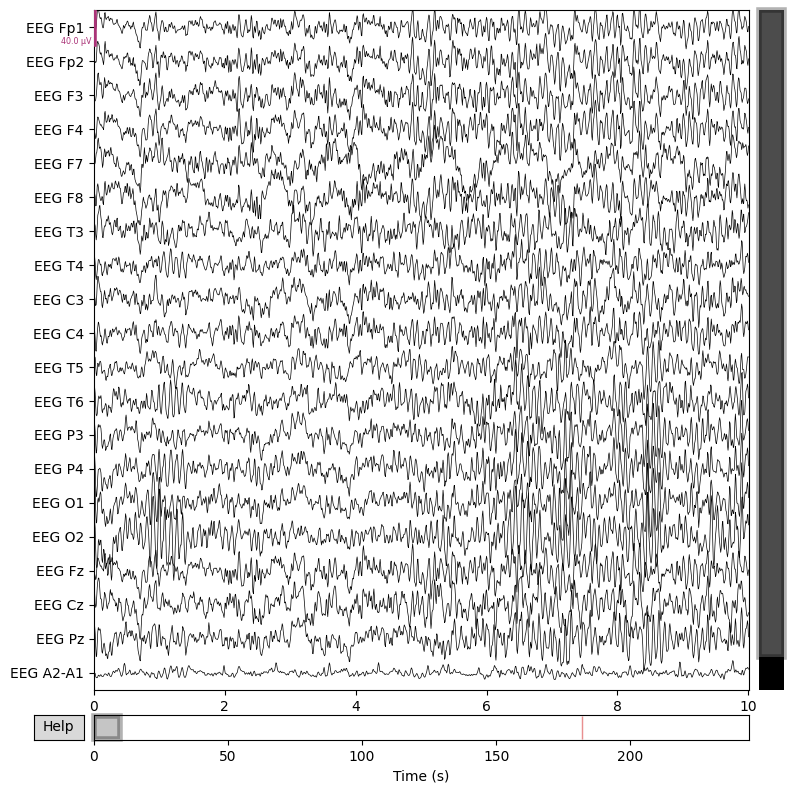

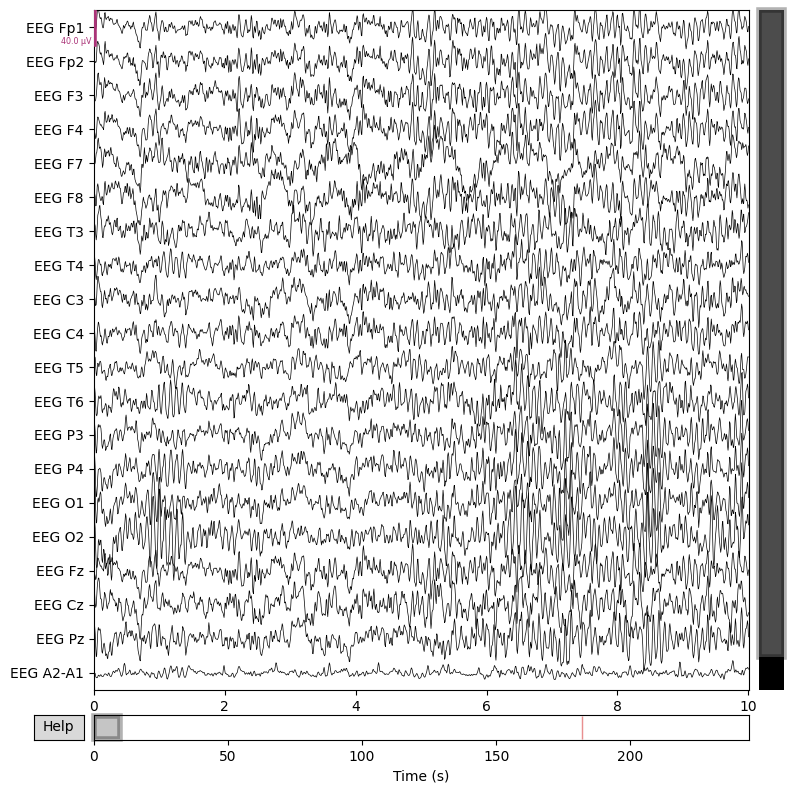

In [61]:
for raw in cleaned_raws:
    raw.filter(l_freq=1, h_freq=40)

# Visualize the data to ensure preprocessing was successful
cleaned_raws[0].plot()

In [62]:
cleaned_raws[0].save('preprocessed_subject_0.fif')

Writing c:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\preprocessed_subject_0.fif
Closing c:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\preprocessed_subject_0.fif
[done]


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14416\886966154.py:1: RuntimeWarning: This filename (c:\Users\dhanu\Downloads\EEG_task\eeg-during-mental-arithmetic-tasks-1.0.0\preprocessed_subject_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  cleaned_raws[0].save('preprocessed_subject_0.fif')
